### Exploratory Data Analysis
References:
https://www.kaggle.com/willkoehrsen/start-here-a-gentle-introduction

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#### Read data

In [2]:
# read train data
train_df = pd.read_csv('data/application_train.csv')
train_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
# read test data
test_df = pd.read_csv('data/application_test.csv')
test_df.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# read data about previous applications
previous_applications = pd.read_csv('data/previous_application.csv')
previous_applications.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# read bureau data
bureau_df = pd.read_csv('data/bureau.csv')
bureau_df.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


#### Explore Train Dataset

In [6]:
# all features in group of score from external data source
score_from_external_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']

# list of all features about client's building conditions.
building_conditions_features = [
                                'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 
                                'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG',
                                'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
                                'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE',
                                'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 
                                'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE',
                                'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 
                                'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
                                'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI',
                                'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 
                                'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE',
                                'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'
                               ]

# list of features related to document checked.
documents_features = ['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
                      'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9',
                      'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
                      'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
                      'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']



In [7]:
train_df[score_from_external_features].count()

EXT_SOURCE_1    134133
EXT_SOURCE_2    306851
EXT_SOURCE_3    246546
dtype: int64

In [8]:
train_df[documents_features].sum()

FLAG_DOCUMENT_2         13
FLAG_DOCUMENT_3     218340
FLAG_DOCUMENT_4         25
FLAG_DOCUMENT_5       4648
FLAG_DOCUMENT_6      27078
FLAG_DOCUMENT_7         59
FLAG_DOCUMENT_8      25024
FLAG_DOCUMENT_9       1198
FLAG_DOCUMENT_10         7
FLAG_DOCUMENT_11      1203
FLAG_DOCUMENT_12         2
FLAG_DOCUMENT_13      1084
FLAG_DOCUMENT_14       903
FLAG_DOCUMENT_15       372
FLAG_DOCUMENT_16      3053
FLAG_DOCUMENT_17        82
FLAG_DOCUMENT_18      2500
FLAG_DOCUMENT_19       183
FLAG_DOCUMENT_20       156
FLAG_DOCUMENT_21       103
dtype: int64

In [9]:
train_df[building_conditions_features].count()

APARTMENTS_AVG                  151450
BASEMENTAREA_AVG                127568
YEARS_BEGINEXPLUATATION_AVG     157504
YEARS_BUILD_AVG                 103023
COMMONAREA_AVG                   92646
ELEVATORS_AVG                   143620
ENTRANCES_AVG                   152683
FLOORSMAX_AVG                   154491
FLOORSMIN_AVG                    98869
LANDAREA_AVG                    124921
LIVINGAPARTMENTS_AVG             97312
LIVINGAREA_AVG                  153161
NONLIVINGAPARTMENTS_AVG          93997
NONLIVINGAREA_AVG               137829
APARTMENTS_MODE                 151450
BASEMENTAREA_MODE               127568
YEARS_BEGINEXPLUATATION_MODE    157504
YEARS_BUILD_MODE                103023
COMMONAREA_MODE                  92646
ELEVATORS_MODE                  143620
ENTRANCES_MODE                  152683
FLOORSMAX_MODE                  154491
FLOORSMIN_MODE                   98869
LANDAREA_MODE                   124921
LIVINGAPARTMENTS_MODE            97312
LIVINGAREA_MODE          

##### Target Variable
the TARGET indicating:
- 0: the loan was repaid.
- 1: the loan was not repaid.

0    282686
1     24825
Name: TARGET, dtype: int64


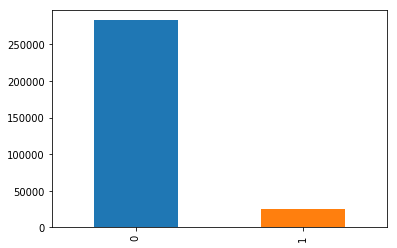

In [10]:
targets = train_df['TARGET'].value_counts()
print(targets)
targets.plot(kind='bar')

Based on the distribution of target variable, only less then 10% of applications was *NOT* repaid. It is **imbalanced** because there are more loans that were repaid on time than the loans that *WERE NOT* repaid.

##### Examine missing values

In [11]:
def missing_value_table(df):
    """
    Function to calculate missing values by columns
    """
    # total missing values
    miss_vals = df.isnull().sum()
    
    # percentage of missing values
    miss_vals_percent = 100 * df.isnull().sum() / len(df)
    
    # make table with results
    miss_vals_table = pd.concat([miss_vals, miss_vals_percent], axis=1)
    
    # remain columns
    miss_vals_table = miss_vals_table.rename(columns = {0: 'Missing Values', 1: '% of Total Values'})
    
    # sort table by percentage of missing values
    miss_vals_table = miss_vals_table[miss_vals_table.iloc[:, 1] != 0].sort_values('% of Total Values', ascending=False).round(1)
    
    # print summary information
    print("Your selected dataframe has {} columns.".format(df.shape[1]))
    print("There are {} columns that have missing values.".format(miss_vals_table.shape[0]))
    return miss_vals_table

In [12]:
missing_values = missing_value_table(train_df)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


##### Column Types

In [13]:
# number of columns of each type
train_df.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [14]:
# Count the number of unique values for each object column (categorical features)
train_df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

##### Label Encoding and One-Hot Encoding

In [15]:
# Create label encoding object
le = LabelEncoder()
le_count = 0

# iterate through the columns:
for col in train_df.columns:
    if train_df[col].dtype == 'object':
        # if two or fewer unique categories
        if len(train_df[col].unique()) <= 2:
            le.fit(train_df[col])
            # Transform both training and testing df
            train_df[col] = le.transform(train_df[col])
            test_df[col] = le.transform(test_df[col])
            
            le_count += 1
            
print("%d columns were label encoded." % le_count)

3 columns were label encoded.


In [16]:
# one-hot encoding of categorical variables
train_df = pd.get_dummies(train_df)
test_df = pd.get_dummies(test_df)

print("Training feature shape: ", train_df.shape)
print("Testing feature shape: ", test_df.shape)

Training feature shape:  (307511, 243)
Testing feature shape:  (48744, 239)


##### Algining Training and Testing dataset

From the number of columns in both training and testing data, we saw that the number of column in training data is greater than test ==> we need to remove the columns in training data that were not in testing data.

In [17]:
train_label = train_df['TARGET']

# align training and testing data, keep only columns present in both dataframes
train_df, test_df = train_df.align(test_df, join='inner', axis=1)

print("Training feature shape: ", train_df.shape)
print("Testing feature shape: ", test_df.shape)

Training feature shape:  (307511, 239)
Testing feature shape:  (48744, 239)


#### Back to Exploratory Data Analysis

##### correlation

In [18]:
# Add target back into the data
train_df['TARGET'] = train_label

# Find correlations with target ans sort
correlations = train_df.corr()['TARGET'].sort_values()

# display correlation
print("Most Positive Correlations: \n", correlations.tail(10))
print("\nMost Negative Correlations: \n", correlations.head(10))

Most Positive Correlations: 
 NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Most Negative Correlations: 
 EXT_SOURCE_3                           -0.178919
EXT_SOURCE_2                           -0.160472
EXT_SOURCE_1                           -0.155317
NAME_EDUCATION_TYPE_Higher education   -0.056593
CODE_GENDER_F                          -0.054704
NAME_INCOME_TYPE_Pensioner             -0.046

##### Effect of Age on Repayment

In [19]:
# Find the correlation of the positive days since birth and target.
train_df['DAYS_BIRTH'] = np.abs(train_df['DAYS_BIRTH'])
train_df['DAYS_BIRTH'].corr(train_df['TARGET'])

-0.07823930830982709

Text(0,0.5,'Count')

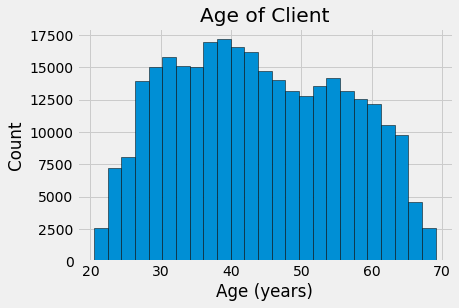

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of plots
plt.style.use('fivethirtyeight')

# plot the distribution of ages in years
plt.hist(train_df['DAYS_BIRTH'] / 365, edgecolor = 'k', bins=25)
plt.title("Age of Client")
plt.xlabel('Age (years)')
plt.ylabel('Count')

Text(0.5,1,'Distribution of Ages')

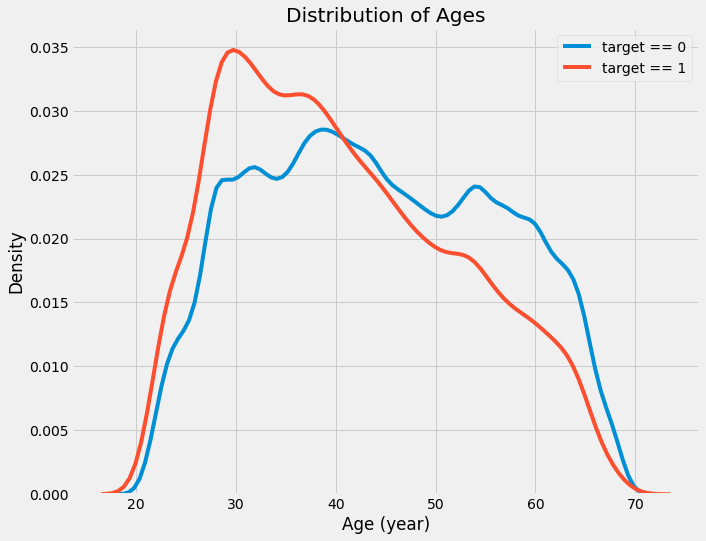

In [24]:
plt.figure(figsize=(10, 8))

# KDE plot of loans that were repaid on time
sns.kdeplot(train_df.loc[train_df['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot of loans that were not repaid on time
sns.kdeplot(train_df.loc[train_df['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

plt.xlabel("Age (year)")
plt.ylabel("Density")
plt.title("Distribution of Ages")

The **target=1** curve skews towards the younger end of range. Although this is not a significant correlation (-0.07 correlation coefficient), this variable is likely going to be useful in ML model because it does affect the target.<br>
Let look at this relationship in another way: average failure to repay loan by age brackets.
+ Cut the `age` categogy into bins of 5 years.
+ For each bin, calculate the average value of target, which tell us the ratio of loans that were not repaid in each ae category.

In [31]:
# Age information into another dataframe
age_data = train_df[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num=11))
age_data.head(10)

/Users/haitruong/working/deliveree/env-setup/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/haitruong/working/deliveree/env-setup/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [32]:
# Group by the bin and calculate the averages
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


Text(0.5,1,'Failure to Repay by Age Group')

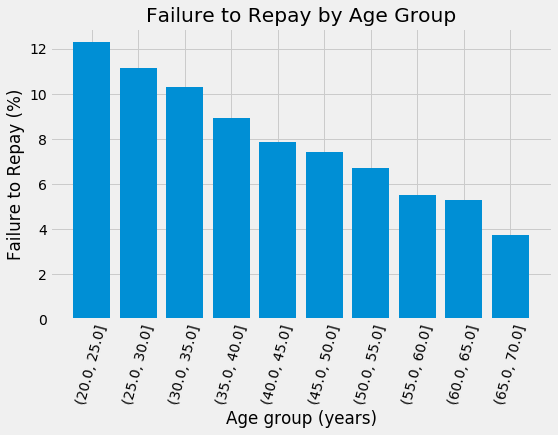

In [36]:
plt.figure(figsize=(8, 5))

# Graph the age bins and average of the target as bar plot
plt.bar(age_groups.index.astype(str), 100* age_groups['TARGET'])

# Plotting labels 
plt.xticks(rotation=75)
plt.xlabel("Age group (years)")
plt.ylabel("Failure to Repay (%)")
plt.title("Failure to Repay by Age Group")

This is a clear trend: younger applicants are more likely **NOT** to repay the loan. The rate of failure to repay is above 10% for the youngest three age groups and below 5% for the oldest age group.

##### Exterior Sources

There are 3 variables with the strongest negative correlations with the target: `EXT_SOURCE_1`, `EXT_SOURCE_2`, `EXT_SOURCE_3`<br>
First, let's show the correlations of the EXT_SOURCE features with the target and each other.

In [38]:
# Extract the EXT_SOURCE variables and show the correlations
ext_data = train_df[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


Text(0.5,1,'Correlation Heat Map')

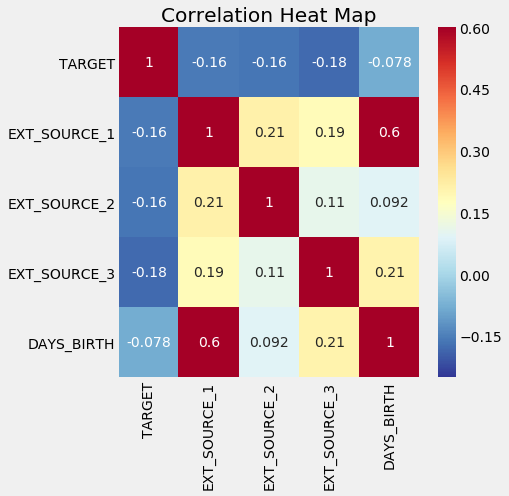

In [46]:
plt.figure(figsize=(6, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin=-0.25, annot=True, vmax=0.6)
plt.title("Correlation Heat Map")

All three ext source features have negative correlation ==> as the value of the EXT_SOURCE increases, the client is more likely to repay the loan.<br>
We can also see that the `DAYS_BIRTH` is positively correlated with `EXT_SOURCE_1` indicating that maybe one of the factors in this score is the client age.<br>
Next, we can look the the distribution of each of these feature colored by the target value.

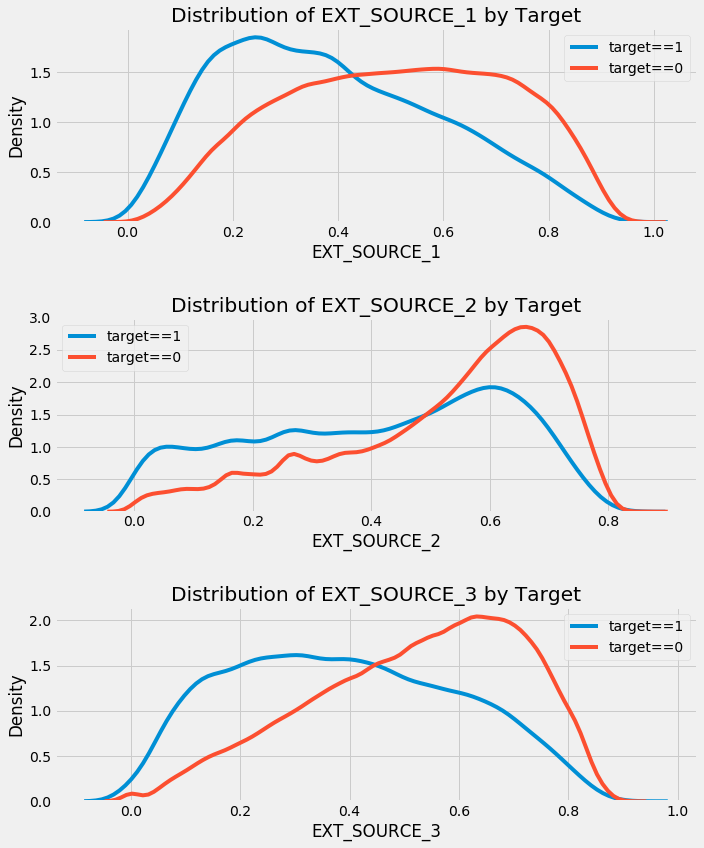

In [56]:
plt.figure(figsize=(10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    # create a new subplot for each source
    plt.subplot(3, 1, i+1)
    # plot the repaid loan
    sns.kdeplot(train_df.loc[train_df['TARGET']==1, source].dropna(), label='target==1')
    # plot the loans that were not repaid
    sns.kdeplot(train_df.loc[train_df['TARGET']==0, source].dropna(), label='target==0')
    
    # Labels the plots
    plt.title("Distribution of %s by Target" % source)
    plt.xlabel('%s' % source)
    plt.ylabel("Density")
    
plt.tight_layout(h_pad=2.5)

##### Pair Plots

We can make pair plots between `EXT_SOURCE` variable and the birthday variable.<br>
The pair plot is a great exploration tool because it lets us see relationships between multiple pairs of variables as well as the distribution of single variables.<br>
We use the PairGris of seaborn visualization libs:
+ scatter plots on the upper triangle.
+ histogram on the diagonal.
+ 2D kernel density plots and correlation coefficient on the lower triangle.

/Users/haitruong/working/deliveree/env-setup/venv36/lib/python3.6/site-packages/matplotlib/contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


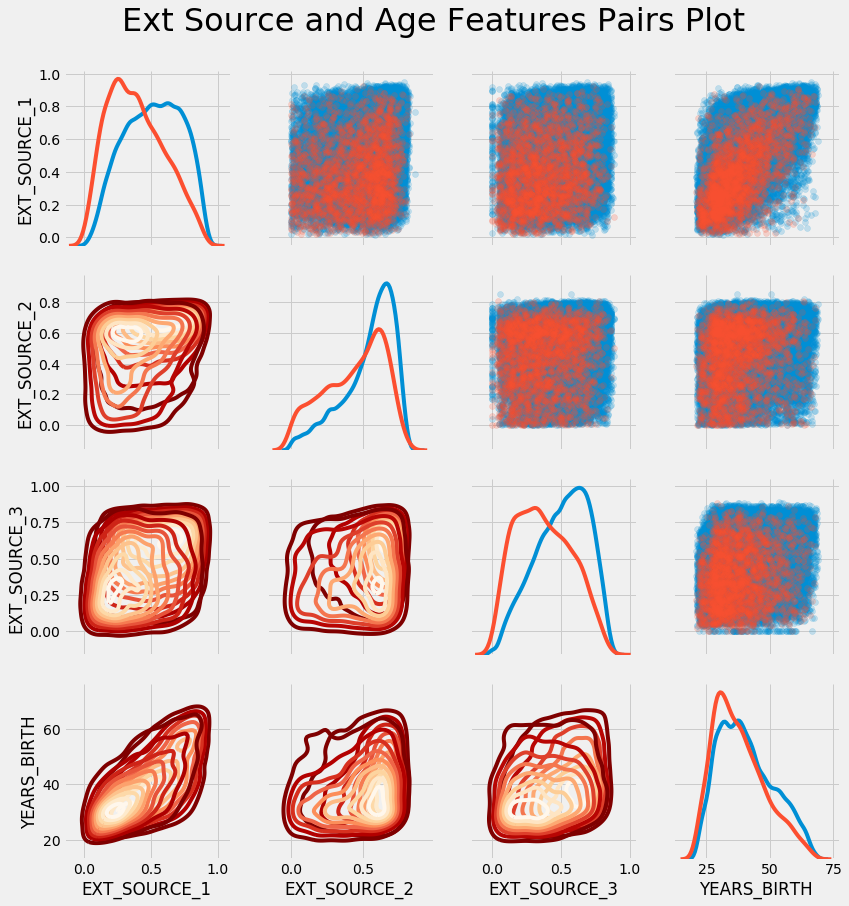

In [62]:
# copy data for plotting
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Add the age of client in years
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# drop na values and limit to first 100000 rows.
plot_data = plot_data.dropna().loc[:100000, :]

# define function to calculate correlation coefficient between two columns
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
               xy = (.2, .8),
               xycoords = ax.transAxes, 
               size = 20)
    
# create a pairgrid object
grid = sns.PairGrid(data = plot_data,
                   size = 3,
                   diag_sharey=False,
                   hue = 'TARGET',
                   vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# upper scatter plot
grid.map_upper(plt.scatter, alpha=0.2)

# diagonal is a histogram
grid.map_diag(sns.kdeplot)

# bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

#### Feature Engineering

Kaggle competetitions are won by feature engineering: those win are those who can create the most useful features out of the data.<br>
This represents one of the patterns in ML: *feature engineering has a greater return on investment than model building and hyperparameter tuning*.<br>
Feature engineering refers to a general process and can involve both :
+ **feature construction**: adding new feature from the existing data.
+ **feature selection**: choosing only the most important features or other methods of dimensionality reduction.

##### Polynomial Features:

In [65]:
# make the new dataframe for polynomial features
poly_features = train_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = train_df[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])

# imputer for handling missing values
imputer = Imputer(strategy='median')
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.fit_transform(poly_features_test)

# create polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree=3)
poly_transformer.fit(poly_features)
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)

print("Polynomial Feature Shape: ", poly_features.shape)

Polynomial Feature Shape:  (307511, 35)


In [69]:
# get the name of polynomial features
poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:10]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2']

In [71]:
# create dataframe of polynomial features
poly_features = pd.DataFrame(poly_features,
                            columns=poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

# add in the target feature
poly_features['TARGET'] = poly_target

# find the correlations with the target variable
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# display the most negative and positive
print("Most positive:")
print(poly_corrs.head(10))
print("Most negative:")
print(poly_corrs.tail(5))

Most positive:
EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
Most negative:
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


In [72]:
# put the test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test,
                                 columns=poly_transformer.get_feature_names(input_features=['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']))

In [73]:
# merge the polynomial into train dataframe
poly_features['SK_ID_CURR'] = train_df['SK_ID_CURR']
train_df_poly = train_df.merge(poly_features, on='SK_ID_CURR', how='left')

# merge polynomial into test dataframe
poly_features_test['SK_ID_CURR'] = test_df['SK_ID_CURR']
test_df_poly = test_df.merge(poly_features_test, on='SK_ID_CURR', how='left')

# align the dataframe
train_df_poly, test_df_poly = train_df_poly.align(test_df_poly, join='inner', axis=1)

# print out the new shape
print("Training data with polynomial features shape: ", train_df_poly.shape)
print("Testing data with polynomial features shape: ", test_df_poly.shape)

Training data with polynomial features shape:  (307511, 274)
Testing data with polynomial features shape:  (48744, 274)


#### Baseline with Logistic Regression Implementation

Preprocessing steps:
+ Filling the missing values
+ Normalizing the range of features ==> feature scaling

In [90]:
# Drop the target from the training data
if 'TARGET' in train_df.columns:
    train = train_df.drop(columns=['TARGET'])
else:
    train = train_df.copy()
feature = list(train.columns)
    
# copy of the testing data
test = test_df.copy()

# median imputation of missing values
imputer = Imputer(strategy='median')

# fit on the train 
imputer.fit(train)

# transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# scale each feature to [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))

# scale data
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print("Training dataset shape: ", train.shape)
print("Testing dataset shape:", test.shape)

Training dataset shape:  (307511, 239)
Testing dataset shape: (48744, 239)


In [79]:
# make the model with specified regularization parameters
log_reg = LogisticRegression(C = 0.0001)

# train on the model
log_reg.fit(train, train_label)

LogisticRegression(C=0.0001, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [80]:
# make the prediction
log_reg_pred = log_reg.predict_proba(test)[:, 1]

In [83]:
# submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

/Users/haitruong/working/deliveree/env-setup/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.087895
1,100005,0.163376
2,100013,0.110105
3,100028,0.076499
4,100038,0.155235


In [84]:
submit.to_csv('log_reg_baseline.csv', index=False)

#### Improved Model: Random Forest

In [ ]:
# random forest classifier with 100 trees
random_forest = RandomForestClassifier(n_estimators=100, random_state=50)

# train on the training data
random_forest.fit(train, train_label)

# make prediction on test data
predictions = random_forest.predict_proba(test)[:, 1]

In [87]:
# submission dataframe
submit = test_df[['SK_ID_CURR']]
submit['TARGET'] = predictions
submit.to_csv('random_forest.csv', index=False)

submit.head()

/Users/haitruong/working/deliveree/env-setup/venv36/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SK_ID_CURR,TARGET
0,100001,0.20
1,100005,0.15
2,100013,0.10
3,100028,0.08
4,100038,0.26


#### Model Interpretation: Feature Importances

In [94]:
# function to calculate and show feature importance
def show_feature_importances(model, features):
    """
    calculate and show feature importances
    """
    # dataframe of feature importances sorted from most to least.
    result = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    })
    result = result.sort_values('importance', ascending=False)
    
    # make a plot
    print(result.head(10))
    print("Number of features with importance greater than 0.01 = ", np.sum(result['importance'] > 0.01))
    result.head(20).plot(x='feature', y='importance', kind='barh', color='red', edgecolor='k', title='Feature Importance')
    
    return result

                   feature  importance
32            EXT_SOURCE_2    0.050268
33            EXT_SOURCE_3    0.046797
10              DAYS_BIRTH    0.032366
13         DAYS_ID_PUBLISH    0.032131
12       DAYS_REGISTRATION    0.031494
0               SK_ID_CURR    0.030535
7              AMT_ANNUITY    0.028903
81  DAYS_LAST_PHONE_CHANGE    0.028474
11           DAYS_EMPLOYED    0.027869
6               AMT_CREDIT    0.027407
Number of features with importance greater than 0.01 =  19


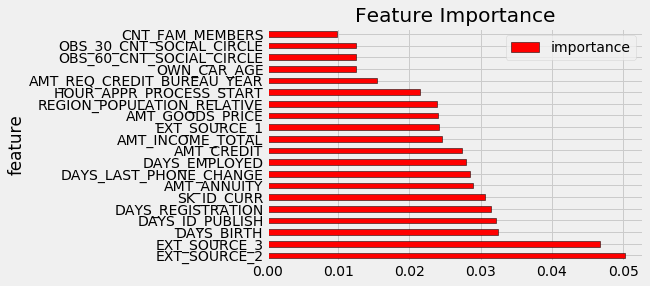

In [95]:
feature_importances = show_feature_importances(random_forest, feature)